In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [3]:
driver_df_train = pd.read_csv('fordTrain.csv')
driver_df_test = pd.read_csv('fordTest.csv')
submission = pd.read_csv('example_submission.csv')
solution = pd.read_csv('solution.csv')
driver_df_train

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


In [4]:
n_rows = driver_df_train.shape[0]
n_cols = driver_df_train.shape[1]
print( f"The number of rows are {n_rows} and columns are {n_cols}")

The number of rows are 604329 and columns are 33


We have *33 columns* in the dataset which mainly consist of **8 Physical Behaviours**,**11 Environmental Behaviours** and **11 Vehicle Behaviours**

***Visualising the data and finding the Dependency***

<Axes: xlabel='P1', ylabel='Count'>

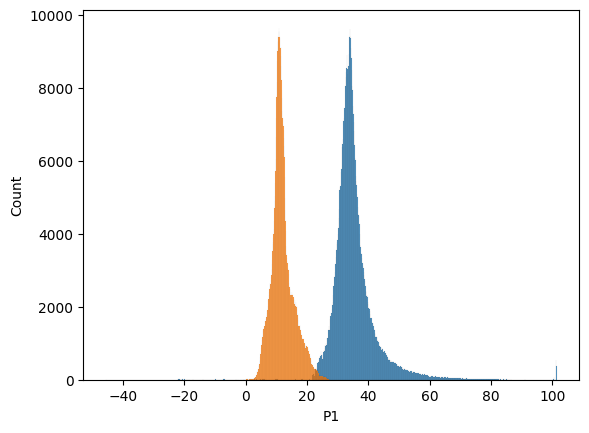

In [ ]:
sns.histplot(driver_df_train.P1)
sns.histplot(driver_df_train.P2)

<Axes: xlabel='IsAlert', ylabel='P1'>

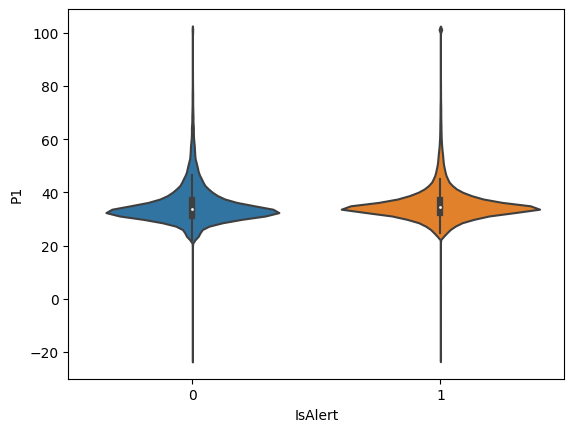

In [6]:
sns.violinplot(x ="IsAlert",
             y ="P1",
             data = driver_df_train)

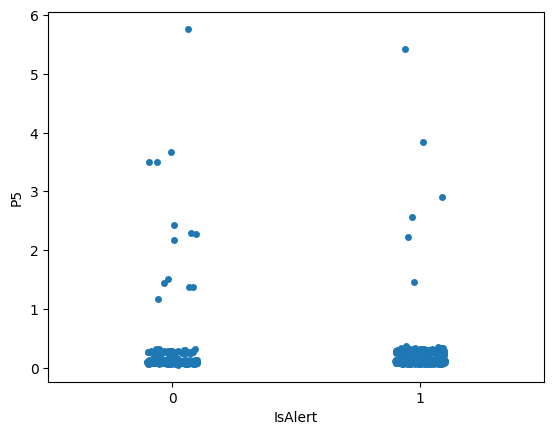

In [7]:
ax = sns.stripplot(x='IsAlert', y='P5', data=driver_df_train.sample(1000))

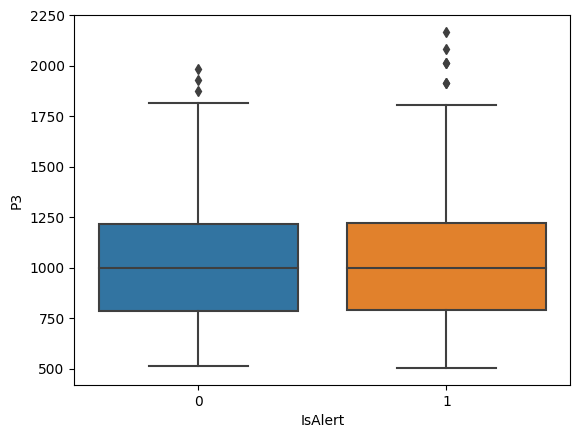

In [11]:
ax = sns.boxplot(x='IsAlert', y='P3', data=driver_df_train.sample(1000))

In [12]:
P_total = driver_df_train.P1 +  driver_df_train.P2 +  driver_df_train.P3 +  driver_df_train.P4 +  driver_df_train.P5 +  driver_df_train.P6 +  driver_df_train.P7 +  driver_df_train.P8
P_total

0         2164.629231
1         2167.875401
2         2172.844601
3         2166.503761
4         2172.346301
             ...     
604324    1685.454531
604325    1687.806731
604326    1685.455031
604327    1693.277431
604328    1693.277431
Length: 604329, dtype: float64

In [13]:
driver_df_train['PTotal'] =  P_total
driver_df_train

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V3,V4,V5,V6,V7,V8,V9,V10,V11,PTotal
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,...,752,5.99375,0,2005,0,13.4,0,4,14.8004,2164.629231
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,...,752,5.99375,0,2007,0,13.4,0,4,14.7729,2167.875401
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,...,752,5.99375,0,2011,0,13.4,0,4,14.7736,2172.844601
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,...,752,5.99375,0,2015,0,13.4,0,4,14.7667,2166.503761
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,...,752,5.99375,0,2017,0,13.4,0,4,14.7757,2172.346301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,...,240,3.01875,0,1801,0,30.4,0,4,15.8113,1685.454531
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,...,240,3.01875,0,1801,0,30.4,0,4,15.8018,1687.806731
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,...,240,3.01875,0,1800,0,31.3,0,4,15.8120,1685.455031
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,...,240,3.01875,0,1800,0,31.3,0,4,15.8270,1693.277431


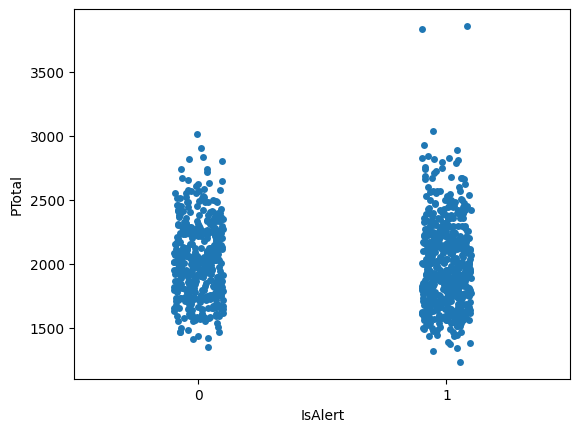

In [14]:
ax = sns.stripplot(x='IsAlert', y='PTotal', data=driver_df_train.sample(1000))

In [15]:
driver_df_train['VTotal'] = driver_df_train.V1 + driver_df_train.V2 + driver_df_train.V3 + driver_df_train.V4  + driver_df_train.V5 + driver_df_train.V6 + driver_df_train.V7 + driver_df_train.V8 + driver_df_train.V9 + driver_df_train.V10 +  driver_df_train.V11 

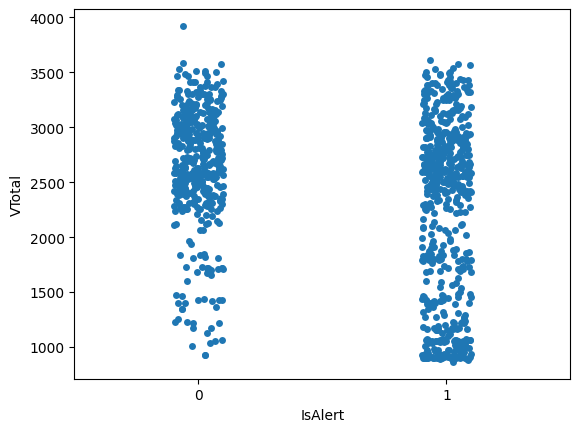

In [16]:
ax = sns.stripplot(x='IsAlert', y='VTotal', data=driver_df_train.sample(1000))

In [17]:
driver_df_train['ETotal'] = driver_df_train.E1 + driver_df_train.E2 + driver_df_train.E3 + driver_df_train.E4 + driver_df_train.E5 + driver_df_train.E6 + driver_df_train.E7 + driver_df_train.E8 + driver_df_train.E9 + driver_df_train.E10 + driver_df_train.E11

In [18]:
driver_df_train

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V5,V6,V7,V8,V9,V10,V11,PTotal,VTotal,ETotal
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,...,0,2005,0,13.4,0,4,14.8004,2164.629231,2897.32915,365.015875
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,...,0,2007,0,13.4,0,4,14.7729,2167.875401,2899.60165,365.015875
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,...,0,2011,0,13.4,0,4,14.7736,2172.844601,2903.41735,365.015875
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,...,0,2015,0,13.4,0,4,14.7667,2166.503761,2907.22045,365.015875
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,...,0,2017,0,13.4,0,4,14.7757,2172.346301,2909.41445,365.015875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,...,0,1801,0,30.4,0,4,15.8113,1685.454531,2186.02005,630.933379
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,...,0,1801,0,30.4,0,4,15.8018,1687.806731,2186.01055,630.933379
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,...,0,1800,0,31.3,0,4,15.8120,1685.455031,2185.86575,630.933379
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,...,0,1800,0,31.3,0,4,15.8270,1693.277431,2185.88075,630.933379


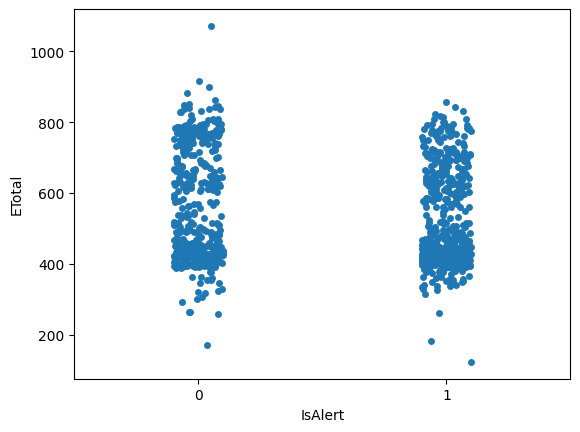

In [19]:
ax = sns.stripplot(x='IsAlert', y='ETotal', data=driver_df_train.sample(1000))

In [20]:
driver_df_train['Total_beh'] = driver_df_train.ETotal + driver_df_train.VTotal + driver_df_train.PTotal

In [22]:
driver_df_train.isna().sum().sum()

0

So, we have visualised the plot and there are no missing values in the dataset

Dividing the Dataset into *input* and *target* features

In [23]:
input_col = list(driver_df_train.columns)[3:]
input_col
target = 'IsAlert'
input_df_t = driver_df_train[input_col].copy()
input_df_t
target_df = driver_df_train[target].copy()
target_df

0         0
1         0
2         0
3         0
4         0
         ..
604324    1
604325    1
604326    1
604327    1
604328    1
Name: IsAlert, Length: 604329, dtype: int64

In [24]:
#Input Features
input_df_t

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V6,V7,V8,V9,V10,V11,PTotal,VTotal,ETotal,Total_beh
0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,...,2005,0,13.4,0,4,14.8004,2164.629231,2897.32915,365.015875,5426.974256
1,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,...,2007,0,13.4,0,4,14.7729,2167.875401,2899.60165,365.015875,5432.492926
2,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,...,2011,0,13.4,0,4,14.7736,2172.844601,2903.41735,365.015875,5441.277826
3,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,...,2015,0,13.4,0,4,14.7667,2166.503761,2907.22045,365.015875,5438.740086
4,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,...,2017,0,13.4,0,4,14.7757,2172.346301,2909.41445,365.015875,5446.776626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,1801,0,30.4,0,4,15.8113,1685.454531,2186.02005,630.933379,4502.407960
604325,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,1801,0,30.4,0,4,15.8018,1687.806731,2186.01055,630.933379,4504.750660
604326,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,1800,0,31.3,0,4,15.8120,1685.455031,2185.86575,630.933379,4502.254160
604327,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,1800,0,31.3,0,4,15.8270,1693.277431,2185.88075,630.933379,4510.091560


In [25]:
#target_df
target_df

0         0
1         0
2         0
3         0
4         0
         ..
604324    1
604325    1
604326    1
604327    1
604328    1
Name: IsAlert, Length: 604329, dtype: int64

***SCALING*** the Dataset --> We will scale the dataset using *MinMaxScaler*


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
input_df_t
inputs = driver_df_train[input_col].copy()
inputs

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V6,V7,V8,V9,V10,V11,PTotal,VTotal,ETotal,Total_beh
0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,...,2005,0,13.4,0,4,14.8004,2164.629231,2897.32915,365.015875,5426.974256
1,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,...,2007,0,13.4,0,4,14.7729,2167.875401,2899.60165,365.015875,5432.492926
2,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,...,2011,0,13.4,0,4,14.7736,2172.844601,2903.41735,365.015875,5441.277826
3,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,...,2015,0,13.4,0,4,14.7667,2166.503761,2907.22045,365.015875,5438.740086
4,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,...,2017,0,13.4,0,4,14.7757,2172.346301,2909.41445,365.015875,5446.776626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,1801,0,30.4,0,4,15.8113,1685.454531,2186.02005,630.933379,4502.407960
604325,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,1801,0,30.4,0,4,15.8018,1687.806731,2186.01055,630.933379,4504.750660
604326,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,1800,0,31.3,0,4,15.8120,1685.455031,2185.86575,630.933379,4502.254160
604327,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,1800,0,31.3,0,4,15.8270,1693.277431,2185.88075,630.933379,4510.091560


In [28]:
scaler = StandardScaler()
scaler = StandardScaler().fit(inputs[input_col])

In [29]:
inputs[input_col] = scaler.transform(inputs[input_col])
inputs

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V6,V7,V8,V9,V10,V11,PTotal,VTotal,ETotal,Total_beh
0,-0.094650,-0.571923,1.207100,-1.073342,0.299961,-0.109121,1.453735,0.0,-0.748259,-0.807726,...,0.468009,0.0,0.059802,0.0,0.553032,0.315280,0.040812,0.649974,-1.161709,0.158000
1,-0.137284,0.376214,1.207100,-1.073342,0.299961,-0.109121,1.453735,0.0,-0.748259,-0.807726,...,0.471244,0.0,0.059802,0.0,0.553032,0.312512,0.042098,0.653031,-1.161709,0.160104
2,-0.147545,0.847987,1.207100,-1.073342,0.299961,-0.107524,1.414549,0.0,-0.748259,-0.807726,...,0.477714,0.0,0.059802,0.0,0.553032,0.312582,0.044067,0.658165,-1.161709,0.163454
3,-0.147892,-0.837586,1.207100,-1.073342,0.299961,-0.107524,1.414549,0.0,-0.748259,-0.807726,...,0.484185,0.0,0.059802,0.0,0.553032,0.311888,0.041555,0.663282,-1.161709,0.162486
4,-0.149215,0.718795,1.207100,-1.073342,0.299961,-0.107524,1.414549,0.0,-0.748259,-0.807726,...,0.487420,0.0,0.059802,0.0,0.553032,0.312794,0.043870,0.666234,-1.161709,0.165550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,-0.460133,-0.495740,-0.732905,0.553658,-0.261052,-0.066013,0.556988,0.0,0.519228,0.937619,...,0.138005,0.0,1.533952,0.0,0.553032,0.417037,-0.149054,-0.307048,0.637661,-0.194503
604325,-0.455563,0.120702,-0.732905,0.553658,-0.261052,-0.066013,0.556988,0.0,0.519228,0.937619,...,0.138005,0.0,1.533952,0.0,0.553032,0.416081,-0.148122,-0.307061,0.637661,-0.193609
604326,-0.450633,-0.514515,-0.732905,0.553658,-0.261052,-0.066013,0.556988,0.0,0.519228,0.937619,...,0.136388,0.0,1.611995,0.0,0.553032,0.417108,-0.149053,-0.307255,0.637661,-0.194561
604327,-0.445396,1.555326,-0.732905,0.553658,-0.261052,-0.066013,0.556988,0.0,0.519228,0.937619,...,0.136388,0.0,1.611995,0.0,0.553032,0.418618,-0.145954,-0.307235,0.637661,-0.191573


Dividing tha Data into *Training and Validation* Set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
input_train,input_val,train_target,val_target = train_test_split(inputs,target_df,test_size=0.2,random_state=42)

In [32]:
input_train

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V6,V7,V8,V9,V10,V11,PTotal,VTotal,ETotal,Total_beh
517921,0.067309,-1.510471,1.026033,-0.982948,-0.149545,-0.050047,0.293126,0.0,-0.748259,-0.807726,...,-1.592893,0.0,-1.102174,0.0,-0.251094,0.503847,0.068445,-1.847551,-0.543219,-0.488298
540287,-0.242567,1.685290,-1.082106,1.146149,-0.247112,0.020203,-0.587974,0.0,-0.748259,-0.807726,...,0.220506,0.0,0.103160,0.0,0.553032,-0.006108,-0.106154,0.772865,-0.613575,0.082296
244957,-0.285067,0.304199,1.853768,-1.344506,0.383588,0.108016,-1.298543,0.0,-0.748259,-0.807726,...,0.743011,0.0,1.681367,0.0,0.553032,0.270053,0.313981,0.564269,-0.830145,0.415243
374229,-0.051909,-0.987955,1.543367,-1.223347,-0.257566,0.119192,-1.369369,0.0,1.334087,1.923399,...,0.662128,0.0,0.189874,0.0,0.553032,-0.435234,0.286135,0.482027,1.800843,0.513386
471795,-0.120022,0.032704,0.185364,-0.440949,-0.142578,-0.109121,1.453735,0.0,-0.748259,-0.807726,...,0.655657,0.0,-1.102174,0.0,0.553032,0.063448,-0.078687,0.098993,-1.344414,-0.123412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-0.491063,0.819452,-1.004505,0.999038,-0.187877,0.018606,-0.571809,0.0,-0.304101,0.702900,...,-1.372891,0.0,-1.102174,0.0,0.553032,-0.443651,-0.101280,-0.982727,1.061001,-0.316152
259178,-0.321088,-0.703386,-0.034503,-0.253436,0.251176,0.032976,-0.712267,0.0,1.648343,1.752904,...,0.872424,0.0,-1.102174,0.0,0.553032,0.362862,0.019317,1.332309,1.595917,0.486051
365838,-1.177550,-0.274374,-0.357837,0.072901,-0.233175,0.087260,-1.157107,0.0,1.344052,-0.762440,...,0.303007,0.0,0.814220,0.0,0.553032,-0.422174,0.030889,-0.188859,-0.727572,-0.064791
131932,0.718644,-0.496378,-0.319037,0.030028,-0.229691,-0.026098,-0.051918,0.0,1.336934,0.824353,...,0.419479,0.0,0.554076,0.0,0.553032,-0.305589,-0.063794,0.607521,0.834390,0.157786


In [33]:
val_target

551187    0
155822    1
186872    1
66220     1
541241    0
         ..
70728     1
438945    1
557129    0
449348    1
493164    1
Name: IsAlert, Length: 120866, dtype: int64

Training the data using *logistic Regression model*

In [231]:
#Import the model
from sklearn.linear_model import LogisticRegression

In [232]:
#Create the model
model1 = LogisticRegression(solver='liblinear',random_state=42)

In [233]:
#Train the model
model1.fit(input_train,train_target)

LogisticRegression(random_state=42, solver='liblinear')

In [234]:
#Predict the output
pred = model1.predict(input_train)

In [239]:
from sklearn.metrics import accuracy_score

In [240]:
#Calculating the Accuracy 
accuracy_score(train_target,pred)

0.7903500371279705

In [241]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(train_target,pred,normalize='true')

<Axes: >

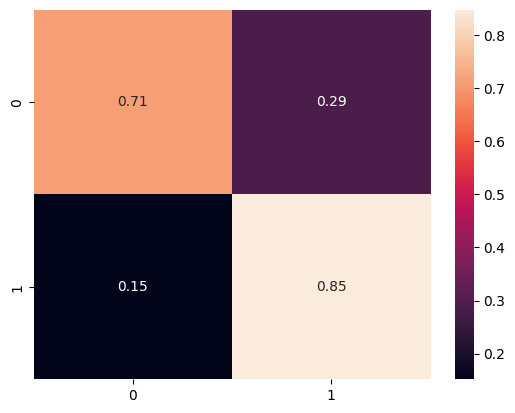

In [242]:
sns.heatmap(mat,annot=True)

Training the model with *Random Forest Algorithm*

In [243]:
from sklearn.ensemble import RandomForestClassifier

In [244]:
model = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=90,max_depth=20)
model.fit(input_train,train_target)

RandomForestClassifier(max_depth=20, n_estimators=90, n_jobs=-1,
                       random_state=42)

In [245]:
model.score(input_train,train_target)

0.9777583806826996

In [246]:
model.score(input_val,val_target)

0.9720516936111065

Changing the new input features to the required values

In [247]:

driver_df_test['PTotal'] = driver_df_test.P1 +  driver_df_test.P2 +  driver_df_test.P3 +  driver_df_train.P4 +  driver_df_test.P5 +  driver_df_test.P6 +  driver_df_test.P7 +  driver_df_test.P8
driver_df_test['VTotal'] = driver_df_test.V1 + driver_df_test.V2 + driver_df_test.V3 + driver_df_test.V4  + driver_df_test.V5 + driver_df_test.V6 + driver_df_test.V7 + driver_df_test.V8 + driver_df_test.V9 + driver_df_test.V10 +  driver_df_test.V11
driver_df_test['ETotal'] = driver_df_test.E1 + driver_df_test.E2 + driver_df_test.E3 + driver_df_test.E4  + driver_df_test.E5 + driver_df_test.E6 + driver_df_test.E7 + driver_df_test.E8 + driver_df_test.E9 + driver_df_test.E10 +  driver_df_test.E11
driver_df_test['Total_beh'] = driver_df_test['PTotal'] + driver_df_test['VTotal']+ driver_df_test['ETotal']
test_input_col = list(driver_df_test.columns)[3:]
test_target = 'IsAlert'
test_input_df = driver_df_test[test_input_col].copy()
test_target_df = driver_df_test[test_target].copy()
scaler = StandardScaler().fit(inputs[input_col])
test_input_df[test_input_col] = scaler.transform(test_input_df[test_input_col])
test_preds = model.predict(test_input_df)
test_target_df = test_preds
    

In [248]:
solution.Prediction

0         1
1         1
2         1
3         1
4         1
         ..
120835    1
120836    1
120837    1
120838    1
120839    1
Name: Prediction, Length: 120840, dtype: int64

In [249]:
test_target_df

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [250]:
model.score(test_input_df,solution.Prediction)

0.7529377689506785

In [251]:
test_target_df
submission['Prediction'] = test_target_df

Training the model with *XGBoost*

In [252]:
#import GBoost
from xgboost import XGBClassifier

In [253]:
#Create the model
model2 = XGBClassifier(n_jobs=-1,random_state=42,n_estimators = 50,max_depth=18)

In [254]:
#Train the model
model2.fit(input_train,train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [255]:
#Calculating the score
model2.score(input_train,train_target)

0.9999379476816219

In [256]:
model2.score(input_val,val_target)

0.9940181688812404

In [257]:
model2.score(test_input_df,solution.Prediction)

0.7526233035418736

Now Applying ***Voting Classifier*** from all the three models and finding the final answer

In [261]:
from sklearn.ensemble import VotingClassifier

In [265]:
from sklearn.metrics import accuracy_score
estimator = []
estimator.append(('LR',LogisticRegression(solver='liblinear')))
estimator.append(('RFC',RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=90,max_depth=20)))
estimator.append(('XGB',XGBClassifier(n_jobs=-1,random_state=42,n_estimators = 100,max_depth=18)))

vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(input_train, train_target)
y_pred = vot_soft.predict(input_train)
score = accuracy_score(train_target, y_pred)

In [266]:
score


0.9925289008672846

In [267]:
final_pred = vot_soft.predict(test_input_df)
final_score = accuracy_score(solution.Prediction,final_pred)

In [268]:
final_score

0.7524495200264812

Thus, The final accuracy of the model is *75.24%*